In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/final-btc-data/Final BTC data.csv
/kaggle/input/btc-data/BTC-USD (4).csv
/kaggle/input/lem-tweets/lemmatized_tweets.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("/kaggle/input/lem-tweets/lemmatized_tweets.csv")

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,index,Date,text,Sentiment,counts
0,0,0,0,2019-05-27,appena uscito un nuovo video le cryptomonnaies...,Positive,1
1,1,1,1,2019-05-27,cardano digitize currency eos roi amp bitcoin ...,Positive,2
2,2,2,2,2019-05-27,another test tweet caught stream bitcoin,Positive,3
3,3,3,3,2019-05-27,current crypto price btc usd eth usd ltc usd b...,Positive,4
4,4,4,4,2019-05-27,spiv nosar baz bitcoin asset amp currency,Positive,5


In [5]:
from textblob import TextBlob

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
def getPolarity(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return TextBlob(str(text)).sentiment.polarity

In [7]:
from tqdm import tqdm

In [8]:
data['Polarity'] = data['text'].apply(getPolarity)

In [9]:
data

,Unnamed: 0.1,Unnamed: 0,index,Date,text,Sentiment,counts,Polarity
0,0,0,0,2019-05-27,appena uscito un nuovo video le cryptomonnaies...,Positive,1,0.0000
1,1,1,1,2019-05-27,cardano digitize currency eos roi amp bitcoin ...,Positive,2,0.0000
2,2,2,2,2019-05-27,another test tweet caught stream bitcoin,Positive,3,0.0000
3,3,3,3,2019-05-27,current crypto price btc usd eth usd ltc usd b...,Positive,4,0.0000
4,4,4,4,2019-05-27,spiv nosar baz bitcoin asset amp currency,Positive,5,0.0000
...,...,...,...,...,...,...,...,...
468731,468731,474293,19340103,2019-11-23,xmr worth btc,Positive,246,0.3000
468732,468732,474294,19340104,2019-11-23,eurjpy usdjpy spx usdtry eurusd gbpusd usdjpy ...,Positive,247,0.0000
468733,468733,474295,19340105,2019-11-23,beautiful close yesterday weekly front ran clo...,Positive,248,0.1875
468734,468734,474296,19340106,2019-11-23,one bitcoin biggest holder moved btc worth mil...,Positive,249,0.3000


In [10]:
date = []
polarity = []

sumof = -100
count = 0

for i in range(468735):
    if data['Date'][i] == data['Date'][i+1]:
        sumof = max(sumof, data['Polarity'][i])
#         sumof += data['Polarity'][i]
#         count += 1
    
    else:
#         sumof = sumof/count
        date.append(data['Date'][i])
        polarity.append(sumof)
        sumof = 0
#         count = 0
        

In [11]:
df = pd.DataFrame({'Date': date, 'Polarity': polarity})

In [12]:
df

,Date,Polarity
0,2019-05-27,1.0
1,2019-05-21,1.0
2,2019-05-22,1.0
3,2019-05-10,1.0
4,2019-05-26,1.0
...,...,...
1887,2019-11-18,1.0
1888,2019-11-19,0.8
1889,2019-11-20,1.0
1890,2019-11-21,1.0


In [13]:
sorted_df = df.sort_values(by='Date')

In [14]:
sorted_df

,Date,Polarity
1256,2014-09-18,1.000000
1257,2014-09-19,0.153333
550,2014-09-20,0.300000
549,2014-09-21,0.400000
1259,2014-09-22,0.153333
...,...,...
1887,2019-11-18,1.000000
1888,2019-11-19,0.800000
1889,2019-11-20,1.000000
1890,2019-11-21,1.000000


In [15]:
sorted_df = sorted_df.reset_index()

In [16]:
sorted_df.head(50)

,index,Date,Polarity
0,1256,2014-09-18,1.000000
1,1257,2014-09-19,0.153333
2,550,2014-09-20,0.300000
3,549,2014-09-21,0.400000
4,1259,2014-09-22,0.153333
5,1258,2014-09-23,0.500000
6,552,2014-09-24,1.000000
7,553,2014-09-25,1.000000
8,1260,2014-09-26,0.400000
9,551,2014-09-27,0.153333


In [17]:
sorted_df = sorted_df.drop('index', axis = 1)

In [18]:
sorted_df

,Date,Polarity
0,2014-09-18,1.000000
1,2014-09-19,0.153333
2,2014-09-20,0.300000
3,2014-09-21,0.400000
4,2014-09-22,0.153333
...,...,...
1887,2019-11-18,1.000000
1888,2019-11-19,0.800000
1889,2019-11-20,1.000000
1890,2019-11-21,1.000000


In [19]:
btc_data = pd.read_csv("/kaggle/input/btc-data/BTC-USD (4).csv")

In [20]:
btc_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3097,2023-03-11,20187.876953,20792.525391,20068.660156,20632.410156,20632.410156,30180288176
3098,2023-03-12,20628.029297,22185.031250,20448.806641,22163.949219,22163.949219,29279035521
3099,2023-03-13,22156.406250,24550.837891,21918.199219,24197.533203,24197.533203,49466362688
3100,2023-03-14,24201.765625,26514.716797,24081.183594,24746.074219,24746.074219,54622230164


In [21]:
for i in range(1894,3102,1):
    btc_data = btc_data.drop(index = i)

In [22]:
btc_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
1889,2019-11-19,8305.134766,8408.516602,8099.963379,8206.145508,8206.145508,21083613816
1890,2019-11-20,8203.613281,8237.240234,8010.511719,8027.268066,8027.268066,20764300437
1891,2019-11-21,8023.644531,8110.098145,7597.381836,7642.750000,7642.750000,22514243371
1892,2019-11-22,7643.569336,7697.382813,6936.706543,7296.577637,7296.577637,34242315785


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)


In [24]:
btc_data.iloc[:, 1:5]

,Open,High,Low,Close
0,465.864014,468.174011,452.421997,457.334015
1,456.859985,456.859985,413.104004,424.440002
2,424.102997,427.834991,384.532013,394.795990
3,394.673004,423.295990,389.882996,408.903992
4,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
1889,8305.134766,8408.516602,8099.963379,8206.145508
1890,8203.613281,8237.240234,8010.511719,8027.268066
1891,8023.644531,8110.098145,7597.381836,7642.750000
1892,7643.569336,7697.382813,6936.706543,7296.577637


In [25]:
pca.fit(btc_data.iloc[:, 1:4])

PCA(n_components=1)

In [26]:
x_pca = pca.transform(btc_data.iloc[:, 1:4])

In [27]:
pca_df = pd.DataFrame(btc_data['Date'])

In [28]:
pca_df['pca'] = x_pca

In [29]:
pca_df

,Date,pca
0,2014-09-17,-5585.849192
1,2014-09-18,-5619.650339
2,2014-09-19,-5671.807469
3,2014-09-20,-5688.570710
4,2014-09-21,-5685.478361
...,...,...
1889,2019-11-19,7939.998873
1890,2019-11-20,7729.252287
1891,2019-11-21,7319.782371
1892,2019-11-22,6486.455696


In [30]:
price = []
for i in range(1892):
    for j in range(1894):
        if(pca_df['Date'][j] == sorted_df['Date'][i]):
            price.append(pca_df['pca'][j])
            

In [31]:
len(price)

1892

In [32]:
sorted_df['pca'] = price

In [33]:
sorted_df.head()

,Date,Polarity,pca
0,2014-09-18,1.000000,-5619.650339
1,2014-09-19,0.153333,-5671.807469
2,2014-09-20,0.300000,-5688.570710
3,2014-09-21,0.400000,-5685.478361
4,2014-09-22,0.153333,-5691.775312


In [34]:
import  matplotlib.pyplot as plt

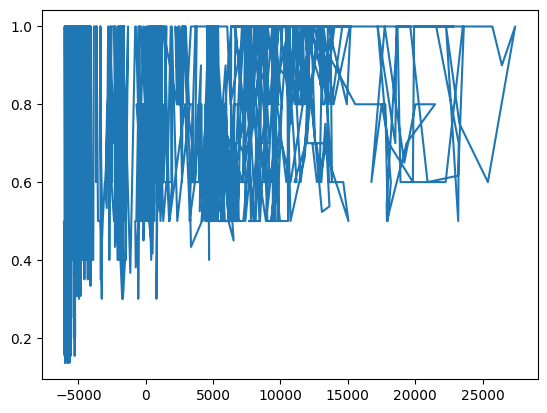

In [35]:
plt.plot(sorted_df['pca'], sorted_df['Polarity'])

In [36]:
x = sorted_df['pca']
y = sorted_df['Polarity']

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x =  scaler.fit_transform(np.array(x).reshape(-1,1))
y =  scaler.fit_transform(np.array(y).reshape(-1,1))

In [38]:
x

array([[0.01282459],
       [0.01126618],
       [0.01076532],
       ...,
       [0.41167613],
       [0.39944159],
       [0.37454264]])

In [39]:
y

array([[1.        ],
       [0.01964912],
       [0.18947368],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]])

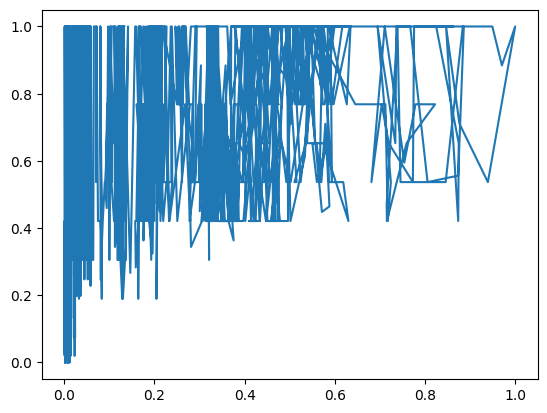

In [40]:
plt.plot(x,y)

In [41]:
x.shape

(1892, 1)

In [42]:
x = x.reshape(x.shape[0], x.shape[1], 1)


In [43]:
x.shape

(1892, 1, 1)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle = True)

In [46]:
x_train.shape

(1513, 1, 1)

In [47]:
x_test.shape

(379, 1, 1)

In [48]:
y_train.shape

(1513, 1)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [50]:
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape = (1,1)))
model.add(LSTM(75, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            40800     
                                                                 
 lstm_1 (LSTM)               (None, 1, 75)             52800     
                                                                 
 lstm_2 (LSTM)               (None, 50)                25200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 118,851
Trainable params: 118,851
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=200, batch_size=25, verbose=1)

Epoch 1/200
61/61 [==============================] - 11s 27ms/step - loss: 0.2856 - val_loss: 0.0959
Epoch 2/200
61/61 [==============================] - 1s 9ms/step - loss: 0.0965 - val_loss: 0.0983
Epoch 3/200
61/61 [==============================] - 1s 8ms/step - loss: 0.0957 - val_loss: 0.0977
Epoch 4/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0967 - val_loss: 0.0970
Epoch 5/200
61/61 [==============================] - 1s 8ms/step - loss: 0.0961 - val_loss: 0.0975
Epoch 6/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0963 - val_loss: 0.0970
Epoch 7/200
61/61 [==============================] - 1s 8ms/step - loss: 0.0960 - val_loss: 0.1011
Epoch 8/200
61/61 [==============================] - 1s 9ms/step - loss: 0.0965 - val_loss: 0.0972
Epoch 9/200
61/61 [==============================] - 1s 8ms/step - loss: 0.0959 - val_loss: 0.0982
Epoch 10/200
61/61 [==============================] - 0s 8ms/step - loss: 0.0970 - val_loss: 0.0971
Epoch 1

In [53]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

12/12 [==============================] - 0s 3ms/step


In [54]:
import math
from sklearn.metrics import mean_squared_error

In [55]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.28791374527179836

In [56]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.2927688935961952

POLARITY IMPUTATION

In [57]:
polarity_imputed = pd.DataFrame({'Date': btc_data['Date']})

In [58]:
polarity_imputed

,Date
0,2014-09-17
1,2014-09-18
2,2014-09-19
3,2014-09-20
4,2014-09-21
...,...
1889,2019-11-19
1890,2019-11-20
1891,2019-11-21
1892,2019-11-22


In [59]:
polarity_imputed['Polarity'] = np.nan

In [60]:
polarity_imputed

,Date,Polarity
0,2014-09-17,NaN
1,2014-09-18,NaN
2,2014-09-19,NaN
3,2014-09-20,NaN
4,2014-09-21,NaN
...,...,...
1889,2019-11-19,NaN
1890,2019-11-20,NaN
1891,2019-11-21,NaN
1892,2019-11-22,NaN


In [61]:
for i in range(1894):
    for j in range(1892):
        if polarity_imputed['Date'][i] == sorted_df['Date'][j]:
            polarity_imputed['Polarity'][i] = sorted_df['Polarity'][j]

/tmp/ipykernel_32/417148334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_imputed['Polarity'][i] = sorted_df['Polarity'][j]


In [62]:
polarity_imputed

,Date,Polarity
0,2014-09-17,NaN
1,2014-09-18,1.000000
2,2014-09-19,0.153333
3,2014-09-20,0.300000
4,2014-09-21,0.400000
...,...,...
1889,2019-11-19,0.800000
1890,2019-11-20,1.000000
1891,2019-11-21,1.000000
1892,2019-11-22,1.000000


In [63]:
polarity_imputed['Close'] = pca_df['pca']

In [64]:
polarity_imputed

,Date,Polarity,Close
0,2014-09-17,NaN,-5585.849192
1,2014-09-18,1.000000,-5619.650339
2,2014-09-19,0.153333,-5671.807469
3,2014-09-20,0.300000,-5688.570710
4,2014-09-21,0.400000,-5685.478361
...,...,...,...
1889,2019-11-19,0.800000,7939.998873
1890,2019-11-20,1.000000,7729.252287
1891,2019-11-21,1.000000,7319.782371
1892,2019-11-22,1.000000,6486.455696


In [65]:
arr = []
arr.append(polarity_imputed['Close'][0])
arr.append(polarity_imputed['Close'][1893])
        
        

In [66]:
arr

[-5585.84919216046, 6252.27525367826]

In [67]:
arr = np.array(arr)

In [68]:
arr.reshape(-1,1)

array([[-5585.84919216],
       [ 6252.27525368]])

In [69]:
arr = arr.reshape(arr.shape[0], 1, 1)

In [70]:
arr.shape

(2, 1, 1)

In [71]:
predicted = model.predict(arr)

1/1 [==============================] - 0s 21ms/step


In [72]:
predicted

array([[-7.5546665],
       [ 0.6285674]], dtype=float32)

In [73]:
polarity_imputed['Polarity'][0] = predicted[0]
polarity_imputed['Polarity'][1893] = predicted[1]


/tmp/ipykernel_32/2319400452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_imputed['Polarity'][0] = predicted[0]
/tmp/ipykernel_32/2319400452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  polarity_imputed['Polarity'][1893] = predicted[1]


In [74]:
polarity_imputed

,Date,Polarity,Close
0,2014-09-17,-7.554667,-5585.849192
1,2014-09-18,1.000000,-5619.650339
2,2014-09-19,0.153333,-5671.807469
3,2014-09-20,0.300000,-5688.570710
4,2014-09-21,0.400000,-5685.478361
...,...,...,...
1889,2019-11-19,0.800000,7939.998873
1890,2019-11-20,1.000000,7729.252287
1891,2019-11-21,1.000000,7319.782371
1892,2019-11-22,1.000000,6486.455696


In [75]:
polarity_imputed.isna().sum().sum()

0

PREDICTION MONDEL


In [76]:
df = polarity_imputed['Close']

In [77]:
df.head()

0   -5585.849192
1   -5619.650339
2   -5671.807469
3   -5688.570710
4   -5685.478361
Name: Close, dtype: float64

In [78]:
bit_data = []
for i in range(10):
    bit_data.append(df[i])
    
for i in range(10,len(df)):
    sumof = 0
    for j in range(1,11,1):
        sumof += df[i-j]
    bit_data.append(sumof/10)

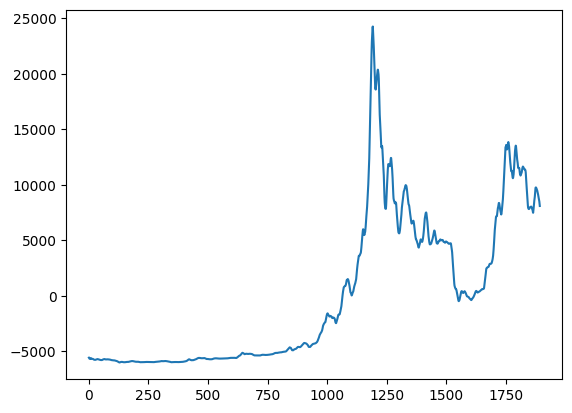

In [79]:
plt.plot(bit_data)

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
bit_data =  scaler.fit_transform(np.array(bit_data).reshape(-1,1))
bit_data =  scaler.fit_transform(np.array(df).reshape(-1,1))

In [81]:
bit_data

array([[0.01383453],
       [0.01282459],
       [0.01126618],
       ...,
       [0.39944159],
       [0.37454264],
       [0.36754557]])

In [82]:
bit_data.shape

(1894, 1)

In [83]:
# splitting the data set into train and test data
training_size = int(len(bit_data)*0.80)
test_size = len(bit_data) - training_size
train_data, test_data = bit_data[:training_size,:], bit_data[training_size:len(bit_data),:1]

In [84]:
# creating data set for LSTM model, for each output data the 100 days back prices are considered as features
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [85]:
time_step = 50
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [86]:
x_train

array([[0.01383453, 0.01282459, 0.01126618, ..., 0.00690815, 0.00688905,
        0.00725009],
       [0.01282459, 0.01126618, 0.01076532, ..., 0.00688905, 0.00725009,
        0.00770154],
       [0.01126618, 0.01076532, 0.01085771, ..., 0.00725009, 0.00770154,
        0.00793201],
       ...,
       [0.32309188, 0.31641244, 0.31818001, ..., 0.31980556, 0.31843202,
        0.32118772],
       [0.31641244, 0.31818001, 0.32320199, ..., 0.31843202, 0.32118772,
        0.32282795],
       [0.31818001, 0.32320199, 0.33158879, ..., 0.32118772, 0.32282795,
        0.32601507]])

In [87]:
x_train.shape

(1464, 50)

In [88]:
y_train.shape

(1464,)

In [89]:
x_test.shape

(328, 50)

In [90]:
# converting the data into 3-D data by reshaping it to feed it into LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [91]:
# x_train.shape

In [92]:
# y

In [93]:
# X_train = []
# for i in range(1464):
#     X = np.append(x_train[i], polarity_imputed['Polarity'][i])
#     X_train.append(X)
    

In [94]:
# X_test = []
# for i in range(328):
#     X = np.append(x_test[i], polarity_imputed['Polarity'][i+1464])
#     X_test.append(X)

In [95]:
# X_train = np.array(X_train)

In [96]:
# X_test = np.array(X_test)

In [97]:
# X_train.shape

In [98]:
# X_test.shape

In [99]:
# converting the data into 3-D data by reshaping it to feed it into LSTM
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [100]:
# X_train.shape

In [101]:
# X_test.shape

In [102]:
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape = (50,1)))
model.add(LSTM(75, return_sequences = True))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [103]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 100)           40800     
                                                                 
 lstm_4 (LSTM)               (None, 50, 75)            52800     
                                                                 
 lstm_5 (LSTM)               (None, 50, 50)            25200     
                                                                 
 lstm_6 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 139,051
Trainable params: 139,051
Non-trainable params: 0
_________________________________________________________________


In [104]:
# X_train[0]

In [105]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=25, verbose=1)

Epoch 1/100
59/59 [==============================] - 9s 40ms/step - loss: 0.0068 - val_loss: 0.0036
Epoch 2/100
59/59 [==============================] - 1s 22ms/step - loss: 0.0020 - val_loss: 0.0038
Epoch 3/100
59/59 [==============================] - 1s 18ms/step - loss: 0.0016 - val_loss: 0.0023
Epoch 4/100
59/59 [==============================] - 1s 17ms/step - loss: 0.0020 - val_loss: 0.0039
Epoch 5/100
59/59 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/100
59/59 [==============================] - 1s 17ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 7/100
59/59 [==============================] - 1s 16ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/100
59/59 [==============================] - 1s 17ms/step - loss: 8.0891e-04 - val_loss: 0.0023
Epoch 9/100
59/59 [==============================] - 1s 17ms/step - loss: 7.2298e-04 - val_loss: 9.0532e-04
Epoch 10/100
59/59 [==============================] - 1s 17ms/step - loss: 6.6028e-04 - 

In [106]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

11/11 [==============================] - 0s 6ms/step


In [107]:
import math
from sklearn.metrics import mean_squared_error

In [108]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.01129872087295065

In [109]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.013788701489889138

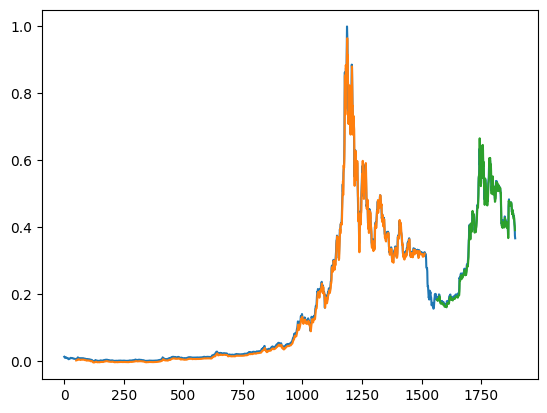

In [110]:
# plotting train predictions
look_back = 50
train_predict_plot = np.empty_like(bit_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back : len(train_predict)+look_back, :] = train_predict
# plotting test predictions
test_predict_plot = np.empty_like(bit_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1 : len(df)-1, :] = test_predict
# plotting baselines and predictions
plt.plot(bit_data)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()